<h1> Logistic Regression <h1>
<h2> ROMÂNĂ <h2>
<blockquote><p>În final, o să observăm dacă Google PlayStore a avut destule date pentru a putea prezice popularitatea unei aplicații de trading sau pentru topul jocurilor plătite.
Lucrul acesta se va face prin împărțirea descărcărilor în 2 variabile dummy. Cu mai mult de 1.000.000 pentru variabila 1 și cu mai puțin de 1.000.000 pentru variabila 0, pentru 
aplicațiile de Trading și pentru jocurile plătite cu mai mult de 670.545 de descărcari pentru variabila 1 iar 0 corespunde celorlalte aplicații.</p></blockquote>
<h2>ENGLISH<h2>

<blockquote><p>Lastly, we shall see if Google PlayStore had enough data in order to predict the popularity of a trading app or for the top paid games of the store . 
This will be done by dividing the downloads into 2 dummy variables. With more than 1,000,000 for variable 1 and less than 1,000,000 for variable 0, for Trading applications and for paid games with more than 670,545 downloads for variable 1 and 0 corresponding to the other applications.</p></blockquote>


<h3>Now we shall create a logistic regression model using a 80/20 ratio between the training sample and the testing sample<h3>

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def Log_reg(x,y):
    model = LogisticRegression(solver='liblinear',C=10, random_state=0).fit(x,y)
    print("Model accuracy",model.score(x,y))
    cm = confusion_matrix(y, model.predict(x))
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.title('Confusion Matrix')        
    plt.show()
    print(classification_report(y, model.predict(x)))
    scores = cross_val_score(model, x,y, cv=10)
    print('Cross-Validation Accuracy Scores', scores)
    scores = pd.Series(scores)
    print("Mean Accuracy: ",scores.mean())

In [18]:
import pandas as pd
import numpy as np

#path = "D:\Java\VS-CodPitonul\\GAME.xlsx"
#df = pd.read_excel (path, sheet_name='Sheet1')

path = "D:\Java\VS-CodPitonul\\Trading_Apps.xlsx"
df = pd.read_excel (path, sheet_name='Results')
'''
RO:  Folosește dropna daca ai valori lipsă, altfel îți va da eroare
ENG: Use dropna only if you have missing values else you will recive an error message
'''
#df = df.dropna()

Model accuracy 0.847457627118644


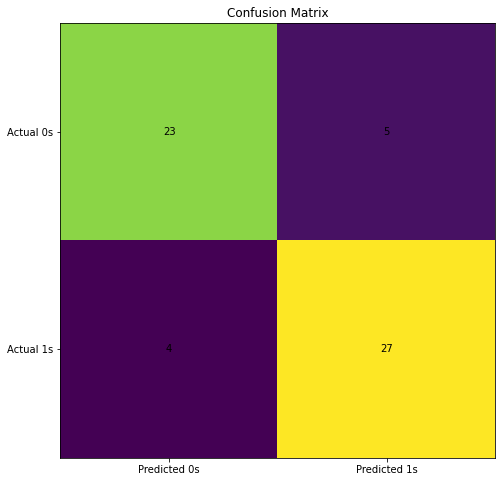

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.84      0.87      0.86        31

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59

Cross-Validation Accuracy Scores [0.83333333 0.83333333 0.66666667 0.5        1.         0.83333333
 1.         0.83333333 0.83333333 0.8       ]
Mean Accuracy:  0.8133333333333332


In [19]:

#Log_reg(df[['Score','Ratings','Reviews','Months_From_Release','Price']],df['Instalari_Bin']) #For GAME.xlsx
Log_reg(df[['Score','Ratings','Reviews','Months_From_Release']],df['Instalari_Bin'])  #For Trading_Apps.xlsx